In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:140px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch10.N차원 배열(Numpy 배열) 다루기</font></b>
- [NumPy](http://www.numpy.org)
- [NumPy Doc](https://numpy.org/doc/)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절 넘파이 패키지

In [3]:
import numpy as np
np.__version__

# 에드거 앤더슨(Edgar Anderson)의 Iris 데이터셋
# 윈도우에 WSL를 깔려면 리툭스를 깔아야 한다.
# 텐서플로우 2.18을 써야됨. 
# 
# 

'1.23.5'

In [4]:
# np.arang(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차열 배열 생성
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [ ]:
import numpy as np
from numpy import arange

In [11]:
from numpy import arange
a = arange(15,
          dtype=np.int32    # 8, 16, 32, 64, 128, .....
          ).reshape(3, 5)  # 3행 5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [12]:
type(a)    # a변수의 타입

numpy.ndarray

In [13]:
a.dtype    # 

dtype('int32')

In [14]:
a.dtype.name

'int32'

In [15]:
a.itemsize  # a배열 안의 한 요소의 bytesize

4

In [16]:
a.ndim      # 축수(차원수)

2

In [17]:
a.size      # 배열 요소의 갯수

15

In [18]:
a.shape   # 배열의 구조(3행 5열)

(3, 5)

In [20]:
print('shape 조정 전 a \n', a)

shape 조정 전 a 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [21]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [22]:
print('shape 조정 전 a \n', a)
a.shape = (5, 3)
print('shape 조정 후 a \n', a)

shape 조정 전 a 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [23]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [24]:
a.size  # flatten된 배열 return

12

In [26]:
a.dtype

dtype('int32')

In [27]:
a.itemsize  

4

In [32]:
a.dtype = np.int64
a.dtype

dtype('int64')

In [33]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
a.ravel()  # flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [35]:
a.flatten()   # 함수의 결과가 return되면 배열 수정 안함.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
## 1.3 배열 저장

- pkl vs npy
- 객체저장, 배열, 머신러닝 모델 vs 넘파이 전용 포맷


In [36]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

In [44]:
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

In [45]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
%%time
np.save('data/ch10.npy', a) # 저장

CPU times: total: 0 ns
Wall time: 6 ms


In [48]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 0 ns


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty ... linspace
- 랜덤값을 갖는 함수들 : np.random.~ 

## 2.1 array()함수로 넘파이 배열 만들기
- array(obj, dtype=np.xx나 'xx', copy=T/F)

In [51]:
a = np.array([2, 4, 6], dtype=np.int16)   # 정수의 시본 타입은 int32
a

array([2, 4, 6], dtype=int16)

In [52]:
a[0], a[1], a[2]

(2, 4, 6)

In [53]:
for i in a:
    print(i, end='\t')

2	4	6	

In [62]:
b = np.array( [[1.0, 2.0],   # 배열은 동일 자료형의 집합 : 정수->실수->문자
              [4., 5]])
b

array([[1., 2.],
       [4., 5.]])

In [63]:
b[0][1], b[0, 1]   # 2차원 [axis0 행렬, axis0행, axis1열]

(2.0, 2.0)

In [65]:
l = [[1.5, 2.3], [4, 5]]
l[0][1]

2.3

In [66]:
b.dtype   # 정소 기본타입은 int32, 실수 기본 타입은 float64
print(b.itemsize)

8


In [67]:
a.astype(np. float32) # 함수의 결과를 return

array([2., 4., 6.], dtype=float32)

In [73]:
b = b.astype(np. float32)
b

array([[1., 2.],
       [4., 5.]], dtype=float32)

In [74]:
print(b.dtype)
print(b.itemsize)

float32
4


In [76]:
for row in b:
    for item in row:
        print(item, end='\t')   # 1차원 행렬
    print()   # 기행

1.0	2.0	
4.0	5.0	


In [77]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {}'.format(i, j, item, b[i,j]), end='\t')
    print()     # 개행
    
# 개행(줄 바꿈)은 영어로 "line break" 또는 **"carriage return"**이라고 표현합니다.
# 일상적인 줄 바꿈은 "line break"로, 인쇄나 문서 편집에서 사용되는 용어는 "carriage return" 또는 "soft return"이 있습니다. 
# 1
# 영어 표현 정리
# line break: 일반적인 줄 바꿈(텍스트 편집)
# carriage return: 인쇄 등에서 사용되는 줄 바꿈(행 이동)
# soft return: 워드프로세서 등에서 문단 끝에서 줄 바꿈
# 문서 편집, 프로그래밍, 인쇄 등 맥락에 따라 적절한 용어를 선택해 사용할 수 있습니다.

0행0열 : 1.0	0행1열 : 2.0	
1행0열 : 4.0	1행1열 : 5.0	


In [82]:
b = np.array([[1,2,3,4,5], [6,7,8,9,0], [11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [80]:
b[0,1]    # 없는 인덱싱시 에러 ex. b[3,0]

2.0

In [101]:
print('0~1행, 1~2열 :\n', b[0:2, 1:3]) 
print('2행모두(1차원) :', b[2, :], b[2])      #특정행, 모든열을 추출할 경우, 열생략 가능
print('2행모두(2차원) :', b[2:3, :], b[2:3])
print('4열모두(1차원) :', b[:,4], b[...,4], b[:, -1]) # 특정열, 모든행을 추출할 경우
print('2행 0~3열 :', b[2, 0:-1])
print('마지막열 제외 :\n', b[:, :-1])

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열모두(1차원) : [ 5  0 15] [ 5  0 15] [ 5  0 15]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [ ]:
# 파이썬에서 **깊은 복사(deep copy)**는 원본 객체의 모든 하위 요소를 완전히 새로운 객체로 복사하는 방식입니다. 
# 즉, 원본과 복사본이 완전히 독립적으로 동작하며, 한 복사본을 수정해도 원본에는 영향이 없습니다. 

# 깊은 복사의 개념과 사용법
# 깊은 복사는 copy.deepcopy(x, memo) 함수를 사용해 수행할 수 있습니다. 
# 이 함수는 원본 객체의 모든 하위 요소까지 완전히 복사합니다. 
# 얕은 복사와 달리, 깊은 복사는 중첩된 자료구조(예: 리스트, 튜플, 딕셔너리 등)에서도 각 요소가 완전히 독립적으로 복사됩니다. 
 
# 예시:
# import copy
# arr = [[1, 2], [3, 4]]
# arr2 = copy.deepcopy(arr)  # arr2는 arr와 완전히 독립적
# arr [4][0] [4][0] = 'x'
# print(arr)  # [[1, 2], [3, 4]]
# print(arr2)  # [['x', 2], [3, 4]]
# 얕은 복사와의 차이점
# 얕은 복사는 arr.copy() 또는 슬라이싱 arr[:] 등으로 수행할 수 있으며, 
# 중첩된 자료구조에서는 하위 요소까지 복사되지 않아 원본과 복사본이 같은 메모리 주소를 공유할 수 있습니다. 


# 예시:
# arr = [1, [2, 3]]
# arr2 = arr.copy()  # arr2는 arr와 같은 하위 요소 공유
# arr2 [1][1] [4][0] = 'y'
# print(arr)  # [1, [2, 3]]
# print(arr2)  # [1, [2, 3]]

# 실무 활용 팁
# 복잡한 중첩 구조에서는 깊은 복사를 사용하는 것이 안전합니다.
# 간단한 구조는 슬라이싱이나 반복문을 활용한 복사법도 활용할 수 있습니다. 

# 요약:
# 파이썬에서 깊은 복사는 원본과 복사본이 완전히 독립적으로 동작하며, 중첩된 자료구조에서도 안전하게 복사할 수 있는 방법입니다. 
# 얕은 복사와 달리, 모든 하위 요소까지 완전히 복사되므로 데이터의 무결성을 유지해야 할 때 적합합니다. 


In [1]:
# 스칼라 변수
a = 10
copy_a = a # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")

a=10, 복제본10
a=10, 복제본-1


In [2]:
# 데이터 구조
a = [0,1]
copy_a = a.copy() # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본{copy_a}")

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [9]:
# numpy 배열
import numpy as np
c= np.array([ [1,2], [3,4] ])
#d = c  # 이것은 깊은 복사가 아니라 주소 할당
d = np.array(c, copy=True) # 깊은 복사; d=c.copy() 동일

print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0, 0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1866269190800 1866269188976
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.weros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype 속성을 따로 지정 가능

In [35]:
np.zeros((3,5))    # 꼭 튜플을 사용해서 입력해야 함. 스칼라값이더라도 (3.)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [15]:
x = np.zeros((3,))    # 꼭 튜플을 사용해서 입력해야 함. 만약에 스칼라값 3이더라도 다음처럼 해야함 np.zeros(3.)
x

array([0., 0., 0.])

In [13]:
x = np.zeros((2,5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [18]:
np.ones((2,5), dtype=np.uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [23]:
np.full((2,3), -1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

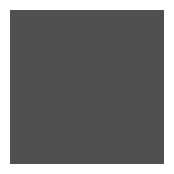

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
img = np.full((28,28), 80, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [28]:
import numpy as np
np.empty((3,2))

array([[0. , 0.2],
       [0.4, 0.6],
       [0.8, 1. ]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.randint(tup) : 0부터 1미만의 균등분포를 갖는 랜던값 배열

- np.random.uniform(loc=0.0, scale=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값

- np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1)
    
cf) np.random.randint([from, ] to) : from부터 to미만의 정수 1개 발생==random.randint(from, to-1)
    
정규분포( nomal distribution )


np.random.rand(2)

In [40]:
import random
random.randint(1, 45)

33

In [49]:
np.random.randint(1,3)

1

In [50]:
np.random.rand(2)

array([0.73658672, 0.38315547])

In [51]:
np.random.randint(1, 3)

1

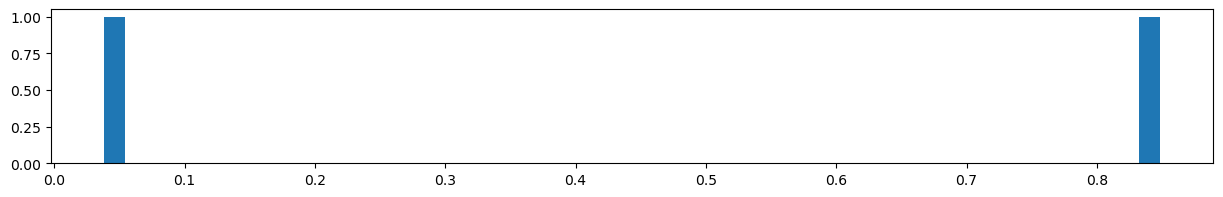

In [55]:
import matplotlib.pyplot as plt
x = np.random.rand(2)
plt.figure(figsize=(15,2))
plt.hist(x, bins=50)
plt.show()

[0.31266424 0.29486955 0.97829944 0.73194812 0.53774332 0.18235606
 0.70643036 0.98520114 0.8626965  0.31673056]


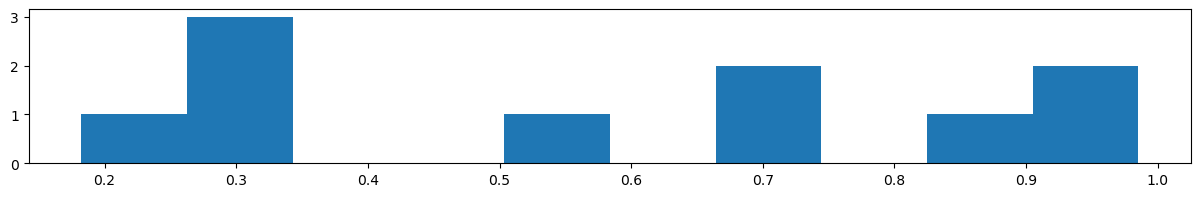

In [58]:
import matplotlib.pyplot as plt
x = np.random.rand(10)
print(x)
plt.figure(figsize=(15,2))
plt.hist(x, )
plt.show()

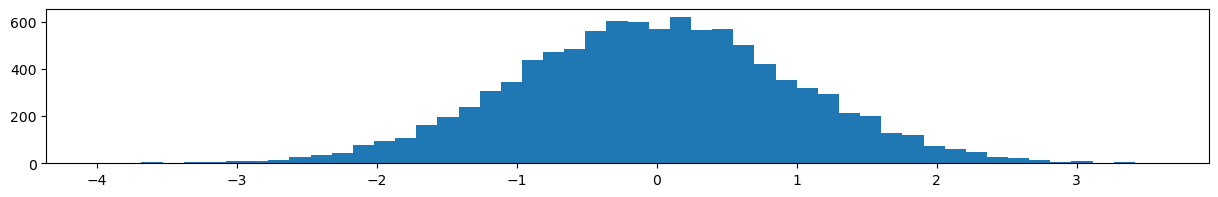

In [67]:
x = np.random.randn(10000)
plt.figure(figsize=(15,2))
plt.hist(x, bins=50)
plt.show()

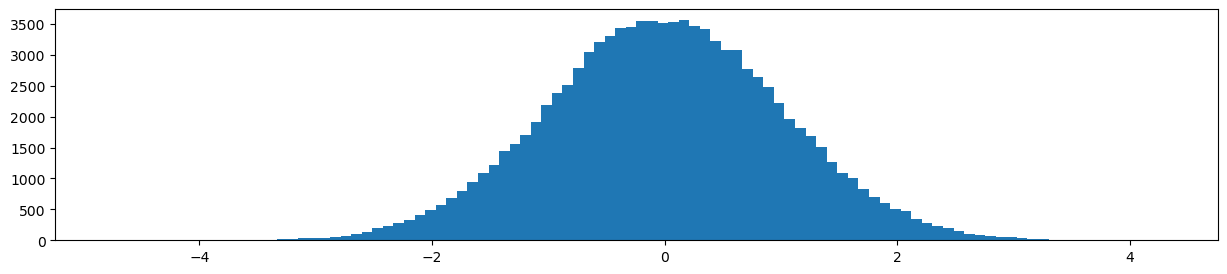

In [66]:
x = np.random.randn(100000)      # 정균분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)
plt.figure(figsize=(15,3))      # 그래프크기
plt.hist(x, bins=100)
plt.show()

In [69]:
# 1차원 난수 배열
print(np.random.rand(3))
print(np.random.randn(3))

[0.88847735 0.15730972 0.97744981]
[ 0.64455066 -1.17962144  0.18965686]


In [70]:
# 2차원 난수 배열
np.random.random((2,5))

array([[0.86093429, 0.60132858, 0.83149837, 0.01859612, 0.78230263],
       [0.42909037, 0.18072857, 0.51545483, 0.86489585, 0.1730464 ]])

In [72]:
np.random.uniform(low=-2, high=2, size=(2,5)) #2행 5열짜리 균등분포(-2~2미만) 난수 배열

array([[ 0.87504596, -1.4427475 ,  0.29276404,  0.5518599 , -1.88874775],
       [ 0.18142024,  0.6628871 ,  0.85080962,  1.35929005,  0.10137646]])

In [74]:
np.random.normal(-1, 1, size=(2,5))

array([[-2.02857412, -0.75959003, -0.38244639,  0.22160873, -2.26620345],
       [-1.51303897,  0.93360112, -2.36430856, -0.88068475, -0.68596388]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
-


In [77]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [79]:
np.arange(0, 2.0, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [81]:
np.linspace(-., 1., 2., 3., 4., 5)

SyntaxError: invalid syntax (1732153121.py, line 1)

In [82]:
#  linspace : 특정한 범위의 수를 많이 생성할 때,
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

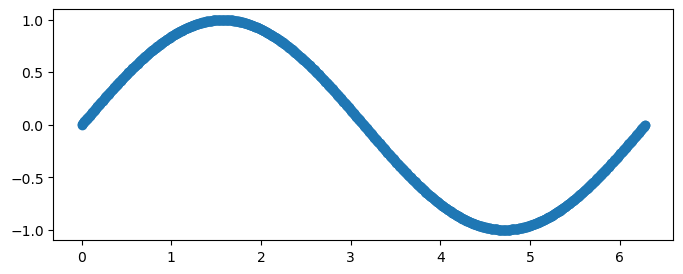

In [84]:
plt.figure(figsize=(8, 3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨. 데이터프레임이 바뀐 것과 리턴 등에 의해 영향을 받음

In [86]:
t = np.random.random((2,3))
t

array([[0.323573  , 0.46301645, 0.26326678],
       [0.8335494 , 0.84941966, 0.97227031]])

a.reshape(-1, 1)

In [89]:
a.reshape(3,-1)

AttributeError: 'numpy.ufunc' object has no attribute 'reshape'

In [90]:
a.resize((3.2))
a

AttributeError: 'numpy.ufunc' object has no attribute 'resize'